<a href="https://colab.research.google.com/github/Mahamoodsk/ShadowFox/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


🔹 First 5 Rows:
                                  Text Sentiment
0  Highly disappointed and frustrated.  Negative
1      The app runs smoothly and fast.  Positive
2          Very poor customer support.  Negative
3   Great design and very comfortable.  Positive
4    The design is simple and minimal.   Neutral

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       110 non-null    object
 1   Sentiment  110 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB
None

🔹 Sentiment Counts:
Sentiment
Positive    40
Negative    35
Neutral     35
Name: count, dtype: int64


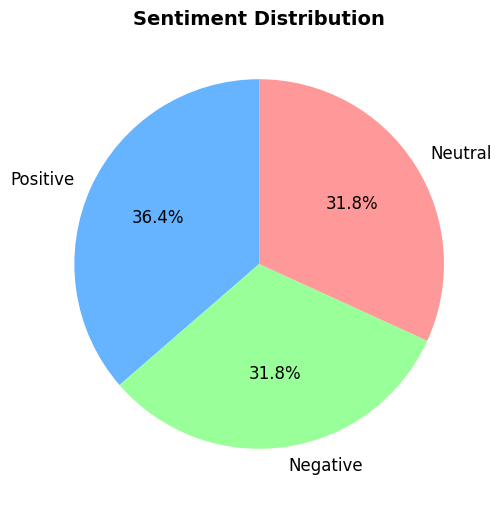

/tmp/ipython-input-1358025412.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2', edgecolor='black')


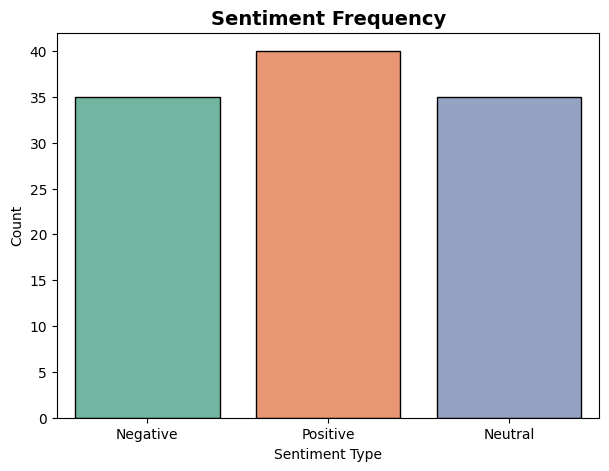

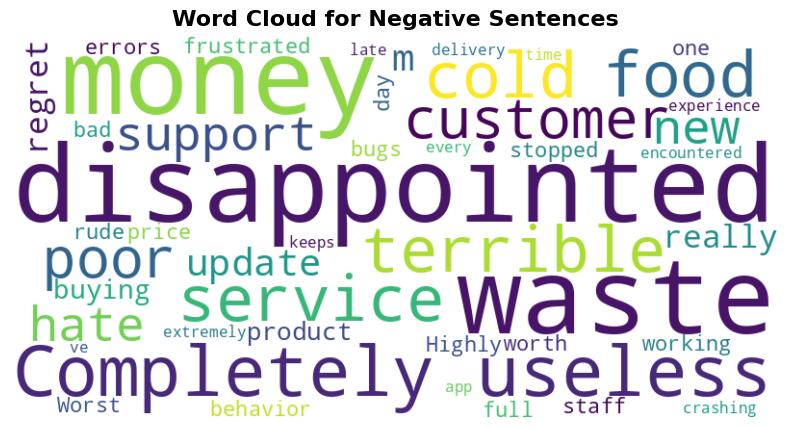

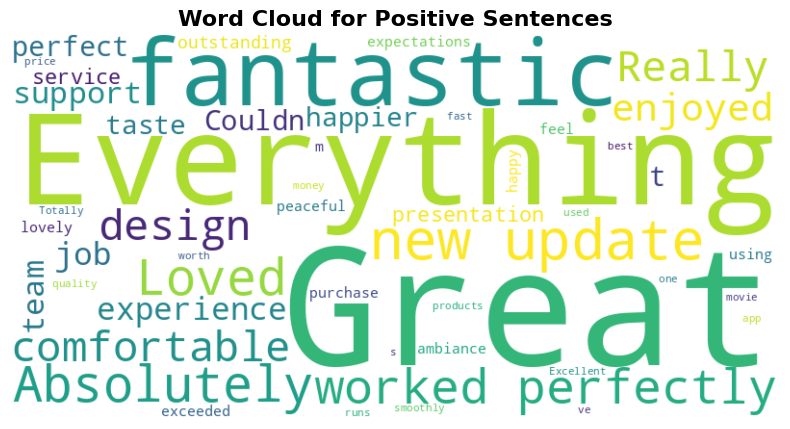

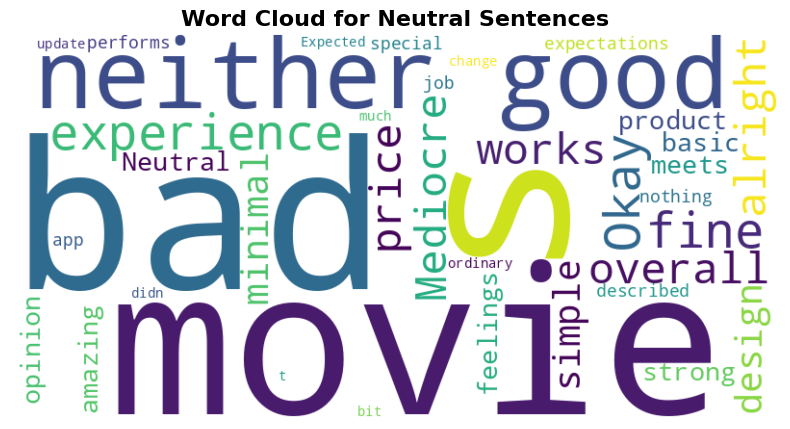

/tmp/ipython-input-1358025412.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Word_Count', palette='cool')


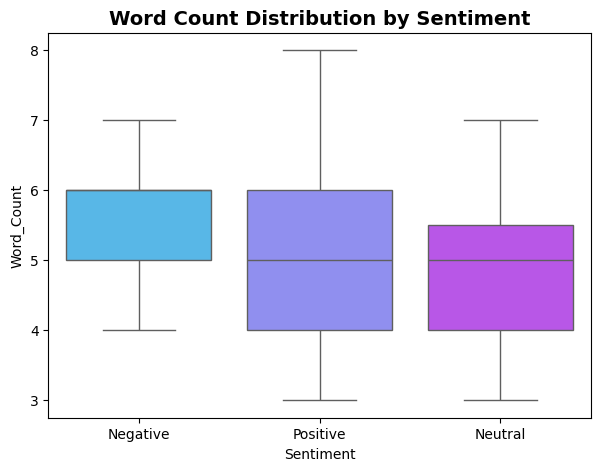

✅ Visualizations completed successfully!


In [2]:
# 📊 Sentiment Analysis EDA with Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = "sentiment_dataset.csv"
df = pd.read_csv(file_path)

# Basic info
print("🔹 First 5 Rows:")
print(df.head())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Sentiment Counts:")
print(df['Sentiment'].value_counts())

# -----------------------------
# PIE CHART – Sentiment Distribution
# -----------------------------
plt.figure(figsize=(6, 6))
df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ff9999'],
    textprops={'fontsize': 12}
)
plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

# -----------------------------
# BAR GRAPH – Sentiment Counts
# -----------------------------
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment', palette='Set2', edgecolor='black')
plt.title("Sentiment Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

# -----------------------------
# WORD CLOUDS for Each Sentiment
# -----------------------------
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(df[df['Sentiment'] == sentiment]['Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentences", fontsize=16, fontweight='bold')
    plt.show()

# -----------------------------
# Average Word Count per Sentiment
# -----------------------------
df['Word_Count'] = df['Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Sentiment', y='Word_Count', palette='cool')
plt.title("Word Count Distribution by Sentiment", fontsize=14, fontweight='bold')
plt.show()

print("✅ Visualizations completed successfully!")
